In [118]:
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

In [119]:
LAYERS = range(0, 12)
MODEL = "bert-base-uncased"
STIMULUS = "slumlordreach" # slumlordreach, black

In [120]:
z_reps = {}
for layer in LAYERS:
    z_reps[layer] = np.load("{}_{}_layer_{}_z_representations.npy".format(STIMULUS, MODEL, layer))

number_of_trs = z_reps[0].shape[0]

In [121]:
# Indexes to slice out individual heads
indices = [x+64 for x in range(0, 768, 64)]
head_indices = list(zip([0]+ indices, indices))

In [122]:
stimulus_responses = []
for i in range(0, number_of_trs):
    z_magnitudes = []
    for layer in LAYERS:
        layer_z_reps = z_reps[layer][i]
#         print(i, layer, layer_z_reps.shape)
        
        for start, end in head_indices:
            attn_head = layer_z_reps[start:end]
#             print(start, end, attn_head.shape)
            z_magnitudes.append(np.linalg.norm(attn_head))
    stimulus_responses.append(z_magnitudes)

In [123]:
z_magnitude_array = np.array(stimulus_responses)
z_magnitude_array.shape

(1177, 144)

In [124]:
magnitude_output_file = "{}_{}_zrep_magnitudes.npy".format(STIMULUS, MODEL)
np.save(magnitude_output_file, z_magnitude_array)

Text(0.5, 0.98, 'Z Magnitudes')

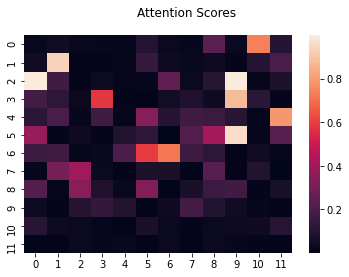

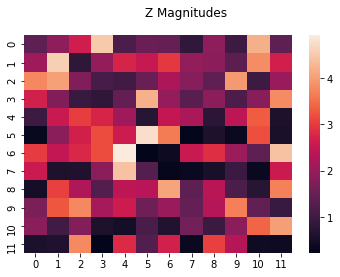

In [125]:
tr_to_compare = 400

attn_scores = np.load("{}_{}_syntactic_complexity_L-inf_T-128_D-bck.npy".format(STIMULUS, MODEL), allow_pickle=True)
attn_square_matrix = np.array(attn_scores[tr_to_compare]).reshape(12,12)
sns.heatmap(attn_square_matrix)
plt.suptitle("Attention Scores")

plt.figure()
z_magnitudes = np.load(magnitude_output_file, allow_pickle=True)
z_square_matrix = np.array(z_magnitudes[tr_to_compare]).reshape(12,12)
sns.heatmap(z_square_matrix)
plt.suptitle("Z Magnitudes")